## Figure 6 The full lifecycle cost (Int$2020) of the faecal sludge management (FSM) system across the sanitation value chain. The bar charts compare the Total Annualised Cost per Household (TACH) for infiltrating pit and septic tank between public utility (NARWASSCO) and private operator (Wambugu). The circle markers show the total costs for each class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# variables
path_excel = r'data.xlsx'
sheet_name = 'lifecycle_cost_fsm'
file_path = r'images/fig6_fsm_fulllifecycle_cost.png'
dpi = 700

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

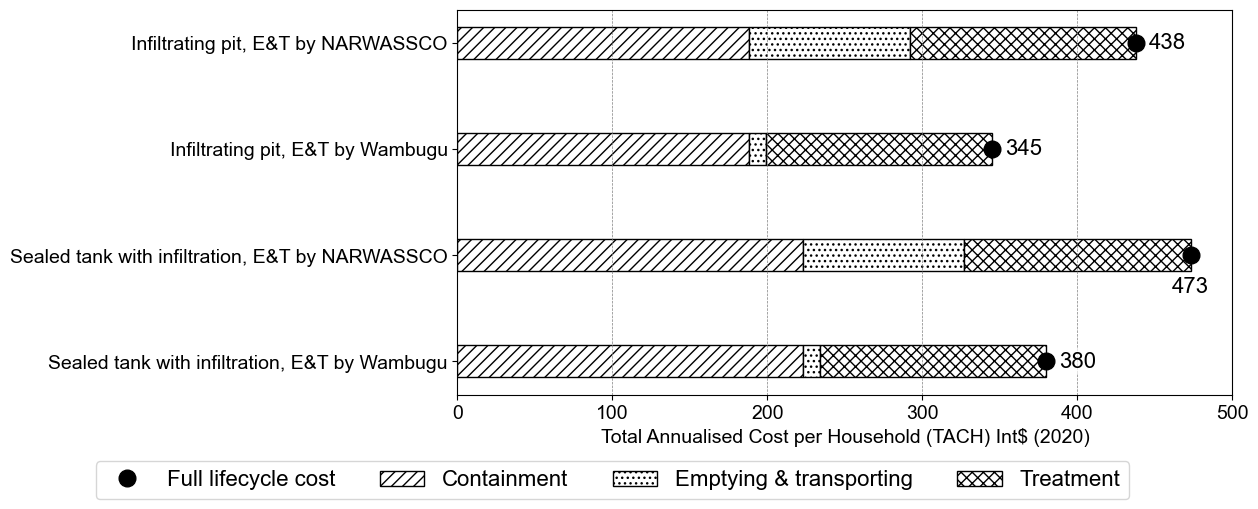

In [6]:
df = pd.read_excel(
    path_excel, 
    sheet_name=sheet_name,
)

fig, ax1 = plt.subplots(figsize=[10,5])

left = None
hatches = ['///', '...', 'xxx'] 
for i, column in enumerate(df.columns[1:]):
    bar = ax1.barh(
        df.iloc[:, 0], 
        df[column], 
        height=0.3,
        color='w', 
        edgecolor='k', 
        left=left, 
        label=column, 
        hatch=hatches[i % len(hatches)]
    )
    left = df[column] if left is None else left + df[column]
    
#     for j, value in enumerate(df[column]):
#         ax1.text(
#             (left[j] / 2) + (left[j] - value)/ 2,
#             j, 
#             str(value),
#             ha='left',
#             va='center',
#             fontsize=14,
#             bbox=dict(boxstyle='round, pad=0.1', facecolor='w', edgecolor='none', alpha=1)
#         )
    
ax1.invert_yaxis()

# ax1.set_title('The full lifecycle cost of the faecal sludge management system\nbetween public utility and private operator', loc='center', fontsize=16)
# ax1.title.set_position([.2, 1.05])

ax1.set_xlabel('Total Annualised Cost per Household (TACH) Int$ (2020)', fontsize=14)

total = df.iloc[:, 1:].sum(axis=1)
ax1.plot(
    total, 
    df.iloc[:, 0], 
    color='k', 
    linestyle='', 
    marker='o', 
    markersize=12, 
    label='Full lifecycle cost')

for i, value in enumerate(total):
    x = value + 20
    y = i
    if i == 2:
        x = value
        y = i + 0.3
    ax1.text(
        x,
        y,
        str(value),
        ha='center',
        va='center',
        fontsize=16,
        bbox=dict(boxstyle='round, pad=0.1', facecolor='w', edgecolor='none', alpha=0.7)
    )

ax1.set_xticks(np.arange(0, max(total)+100, 100))
for i in np.arange(0, max(total)+100, 100):
    ax1.axvline(i, color='gray', linestyle='--', linewidth=0.5)
    
plt.legend(loc="lower center", bbox_to_anchor=(0.2, -0.3), ncol=4, fontsize=16)

plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()